In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz
import seaborn as sns

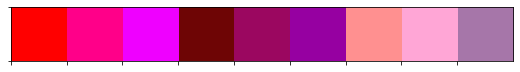

In [15]:
sns.palplot([
    '#FF0000', '#FF0089', '#EF00FF',
    '#6E0505', '#9B0760', '#9600A1',
])

In [42]:
a = range(1,11,1)
print(a)
print(len(a))

range(1, 11)
10


In [59]:
np.linspace(0.5, 5, 10)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [54]:
cn = [10,19,37]
df = pd.DataFrame([1,2,3,4])
df
# ax = df.plot.bar()
# ax.set_xticklabels(cn, rotation=0)
# sns.heatmap(df, cmap='viridis')

,0
0,1
1,2
2,3
3,4


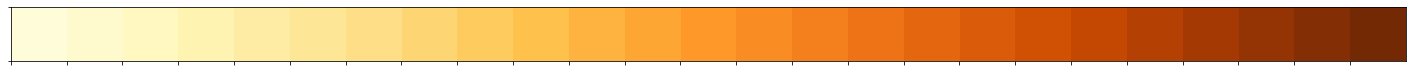

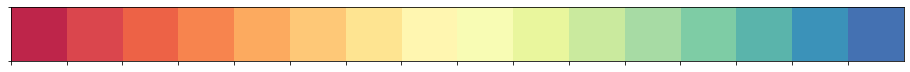

In [24]:
sns.palplot(sns.color_palette("YlOrBr",n_colors=25).as_hex())
sns.palplot(sns.color_palette("Spectral",n_colors=16).as_hex())

# Preprocess:
read csv and normalization

In [38]:
data = pd.read_csv("e-shop data and description/e-shop clothing 2008.csv", delimiter=";")
data = data.drop(['year', 'page 2 (clothing model)'], axis=1)
# scaler = StandardScaler()
# data = pd.DataFrame(data=scaler.fit_transform(data), columns=[data.columns])

In [62]:
countries_dict ={
1 : 'Australia',
2 : 'Austria',
3 : 'Belgium',
4 : 'British Virgin Islands',
5 : 'Cayman Islands',
6 : 'Christmas Island',
7 : 'Croatia',
8 : 'Cyprus',
9 : 'Czech Republic',
10 : 'Denmark',
11 : 'Estonia',
12 : 'unidentified',
13 : 'Faroe Islands',
14 : 'Finland',
15 : 'France',
16 : 'Germany',
17 : 'Greece',
18 : 'Hungary',
19 : 'Iceland',
20 : 'India',
21 : 'Ireland',
22 : 'Italy',
23 : 'Latvia',
24 : 'Lithuania',
25 : 'Luxembourg',
26 : 'Mexico',
27 : 'Netherlands',
28 : 'Norway',
29 : 'Poland',
30 : 'Portugal',
31 : 'Romania',
32 : 'Russia',
33 : 'San Marino',
34 : 'Slovakia',
35 : 'Slovenia',
36 : 'Spain',
37 : 'Sweden',
38 : 'Switzerland',
39 : 'Ukraine',
40 : 'United Arab Emirates',
41 : 'United Kingdom',
42 : 'USA',
43 : 'biz (*.biz)',
44 : 'com (*.com)',
45 : 'int (*.int)',
46 : 'net (*.net)',
47 : 'org (*.org)'
}

In [94]:
data = pd.read_csv("e-shop data and description/e-shop clothing 2008.csv", delimiter=";")
data = data.drop(['year', 'page 2 (clothing model)'], axis=1)
# data = data.sample(n=20000, random_state=100)
country = data['country'].value_counts().index.tolist()
country = np.vectorize(countries_dict.get)(country)
amount = data['country'].value_counts().tolist()
df = pd.DataFrame(data=[country, amount]).T
df.columns = ['country', 'amount']
df

,country,amount
0,Poland,133963
1,Czech Republic,18003
2,Lithuania,4091
3,net (*.net),2522
4,com (*.com),1385
5,Germany,834
6,Ireland,811
7,Slovakia,716
8,United Kingdom,684
9,Belgium,256


In [36]:
data.drop('country', axis=1)

C:\Users\tombe\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,month,day,order,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
0,-1.194051,-1.531599,-0.654194,-1.720424,-1.224067,-1.234220,1.016695,-0.592858,-1.259355,1.023952,-0.722882
1,-1.194051,-1.531599,-0.580002,-1.720424,-1.224067,-1.234220,1.600398,-0.592858,-0.860888,1.023952,-0.722882
2,-1.194051,-1.531599,-0.505809,-1.720424,-0.350259,0.890630,-0.734414,-0.592858,0.653286,-0.976608,-0.722882
3,-1.194051,-1.531599,-0.431616,-1.720424,-0.350259,-0.053748,1.600398,1.686743,-0.462421,1.023952,-0.722882
4,-1.194051,-1.531599,-0.357423,-1.720424,-0.350259,-0.525937,-0.150711,1.686743,0.653286,-0.976608,-0.722882
...,...,...,...,...,...,...,...,...,...,...,...
165469,1.817643,-0.172649,-0.654194,1.707321,-0.350259,-0.998126,0.432992,-0.592858,1.848687,-0.976608,-0.722882
165470,1.817643,-0.172649,-0.654194,1.707463,-1.224067,-0.762031,0.432992,-0.592858,1.450220,-0.976608,-0.722882
165471,1.817643,-0.172649,-0.654194,1.707606,-1.224067,-0.762031,-1.318116,-0.592858,-0.063954,1.023952,-0.722882
165472,1.817643,-0.172649,-0.580002,1.707606,0.523548,1.362819,-1.318116,-0.592858,-0.063954,-0.976608,-0.722882


In [8]:
path = "e-shop data and description/e-shop clothing 2008.csv"
path.split(sep='/')[-1][:-4]
data = pd.read_csv(path, delimiter=";")
target = data['country']
data = data.drop(['year', 'page 2 (clothing model)', 'country'], axis=1)
data

,month,day,order,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
0,4,1,1,1,1,1,5,1,28,2,1
1,4,1,2,1,1,1,6,1,33,2,1
2,4,1,3,1,2,10,2,1,52,1,1
3,4,1,4,1,2,6,6,2,38,2,1
4,4,1,5,1,2,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,24024,2,2,4,1,67,1,1
165470,8,13,1,24025,1,3,4,1,62,1,1
165471,8,13,1,24026,1,3,1,1,43,2,1
165472,8,13,2,24026,3,12,1,1,43,1,1


In [20]:
len(sorted(target.unique()))

47

In [9]:
data.describe()

,month,day,order,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,5.585887,14.524554,9.817476,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,1.328160,8.830374,13.478411,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,4.000000,7.000000,2.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,5.000000,14.000000,6.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,7.000000,22.000000,12.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,8.000000,31.000000,195.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


# Dimension Reduction:

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print('total variance:', str(int((sum(pca.explained_variance_ratio_) * 100))) + '%')
pca_data = pd.DataFrame(data=principal_components, columns = ['dim 1', 'dim 2'])

[9.99990033e-01 3.79335085e-06]
total variance: 99%


# Clustering:

### k means

In [97]:
kmeans_n_clusters = 3
kmeans = KMeans(n_clusters=km_n_clusters, algorithm='full')
kmeans_labels = kmeans.fit_predict(data)

### gmm

In [ ]:
gmm_n_clusters = 6
gmm = GaussianMixture(n_components=gmm_n_clusters, covariance_type='full', init_params='kmeans'
                          , warm_start=False, n_init=5, random_state=100, verbose=2)
gmm.fit(data)
gmm_labels = gmm.predict(data)

### fuzzy c means

In [101]:
fuzzy_n_clusters = 6
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T.values, fuzzy_n_clusters, 2, error=0.005, maxiter=1000)
fuzzy_labels = np.argmax(u, axis=0)

### Hierarchical - agglomerative

In [ ]:
hierarchical_labels = {}
hierarchical_points = 100000
hierarchical_n_clusters = 6
for linkage in ('ward', 'average', 'complete', 'single'):
    hierarchical = AgglomerativeClustering(n_clusters=hierarchical_n_clusters, linkage=linkage)
    hierarchical.fit(data.sample(n=hierarchical_points, random_state=100))
    hierarchical_labels[linkage] = hierarchical.labels_
    print('done with ' + linkage + 'linkage')

### plot clusters:

In [85]:
%matplotlib qt5

In [82]:
def cluster_color(label):
    colors = ['b', 'g', 'r', 'c', 'm', '#fdff03', '#055803', '#a6fc00', '#9d70d1', '#ff703b', '#3a70d8', '#ff70b5']
    return colors[label % len(colors)]

In [83]:
def plot_clusters(data, labels, n_clusters, lfs=10, tfs=8):
    for label in range(n_clusters):
        plt.scatter(data.values[labels==label, 0], data.values[labels==label, 1], s=40, c=cluster_color(label))
    clusters_ax = plt.gca()
    clusters_ax.set_xlabel('dim1', fontsize=lfs)
    clusters_ax.set_ylabel('dim2', fontsize=lfs)
    plt.show()

In [103]:
plot_clusters(pca_data, kmeans_labels, kmeans_n_clusters)

In [95]:
plot_clusters(pca_data, fuzzy_labels, fuzzy_n_clusters)

In [115]:
plot_clusters(pca_data.sample(n=hierarchical_points, random_state=100), hierarchical_labels['ward'], hierarchical_n_clusters)